
### Name : Rohit Yadav

### Task 3 - Neural Network That Can Read Handwriting

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import random
from numpy import argmax


Loading dataset


In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Plotting count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


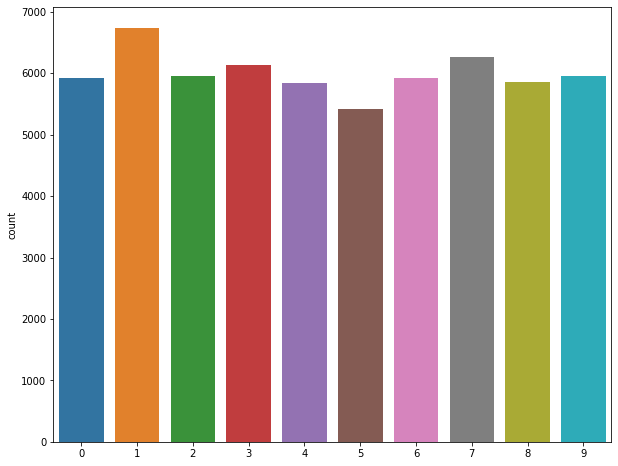

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

Displaying some images


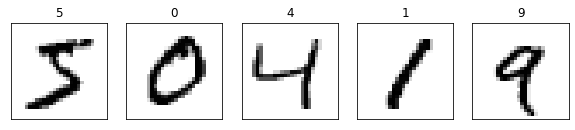

In [4]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

 there are 60,000 images as input data with shape 28 x 28 each.


In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

**Creating the model**

**CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

Training the model

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 652s 385ms/step - loss: 0.2691 - accuracy: 0.9204 - val_loss: 0.0730 - val_accuracy: 0.9842
Epoch 2/10
1688/1688 [==============================] - 649s 385ms/step - loss: 0.1070 - accuracy: 0.9682 - val_loss: 0.0657 - val_accuracy: 0.9865
Epoch 3/10
1688/1688 [==============================] - 643s 381ms/step - loss: 0.0879 - accuracy: 0.9746 - val_loss: 0.0634 - val_accuracy: 0.9875
Epoch 4/10
1688/1688 [==============================] - 640s 379ms/step - loss: 0.0738 - accuracy: 0.9785 - val_loss: 0.0796 - val_accuracy: 0.9845
Epoch 5/10
1688/1688 [==============================] - 646s 383ms/step - loss: 0.0620 - accuracy: 0.9818 - val_loss: 0.0941 - val_accuracy: 0.9877
Epoch 6/10
1688/1688 [==============================] - 646s 382ms/step - loss: 0.0572 - accuracy: 0.9836 - val_loss: 0.1065 - val_accuracy: 0.9855
Epoch 7/10
1688/1688 [==============================] - 645s 382ms/step - loss: 0.0552 - accuracy: 0.9837 - val_

Saving and loading the model


In [16]:
model.save('MNproject.h5')

In [17]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

Evaluating the model


In [18]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 32s 103ms/step - loss: 3.3850 - accuracy: 0.9872
Test Loss 3.3850157260894775
Test Accuracy 0.9872000217437744


Plotting Training & Validation plots


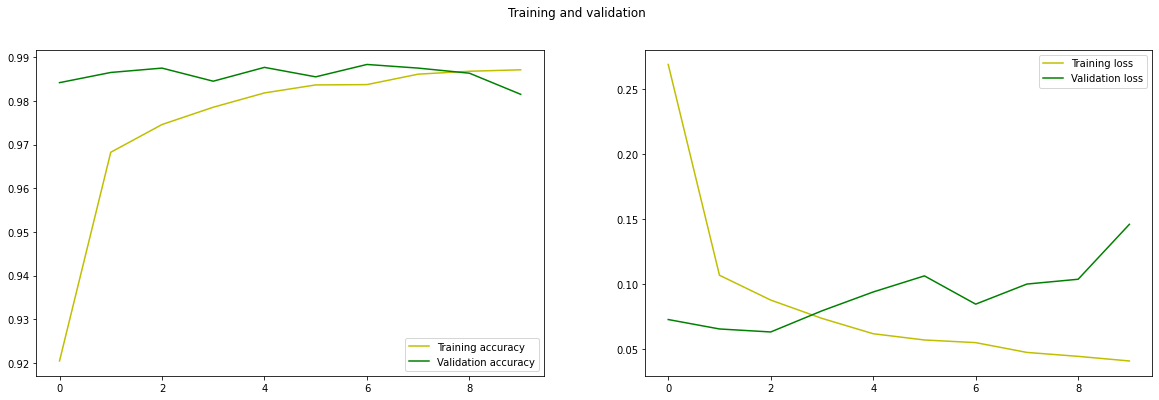

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [20]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    6,    0,    0,    1,    5,    0,    3,    0],
       [   0, 1114,    7,    5,    1,    1,    5,    1,    1,    0],
       [   0,    0, 1026,    0,    0,    0,    1,    3,    2,    0],
       [   0,    0,    3, 1003,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  974,    0,    2,    1,    3,    2],
       [   0,    0,    1,    6,    0,  879,    1,    3,    2,    0],
       [   1,    0,    0,    0,    1,    4,  945,    0,    7,    0],
       [   0,    0,    8,    0,    1,    0,    0, 1015,    2,    2],
       [   0,    0,    3,    1,    0,    0,    0,    2,  967,    1],
       [   1,    0,    0,    1,    9,    0,    0,    0,   14,  984]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

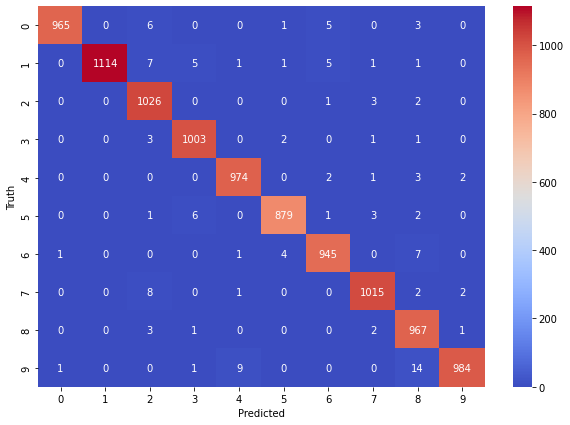

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

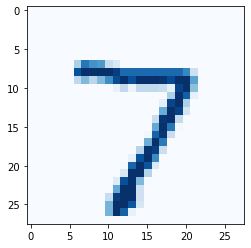

In [22]:
plt.imshow(np.squeeze(x_test[0]),cmap="Blues")

In [23]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

7


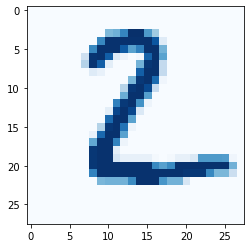

In [24]:
plt.imshow(np.squeeze(x_test[1]),cmap="Blues")

In [25]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

2


# Accuracy : **98.89 %**.